In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import countplot
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 1-Importing Dataset

In [10]:
df = pd.read_csv("F:\\tutorials\machine learning\machine_learning_with_python_jadi-main\heart_disease.csv")

In [11]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# 2- Cleaning Dataset

## 2-1- Deleting Extra Columns

In [12]:
df1 = df.drop('education', axis=1)

## 2-2- Dropping Nan Values

In [13]:
df1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
df1.dropna(inplace=True)

In [15]:
df1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# 3- Plotting

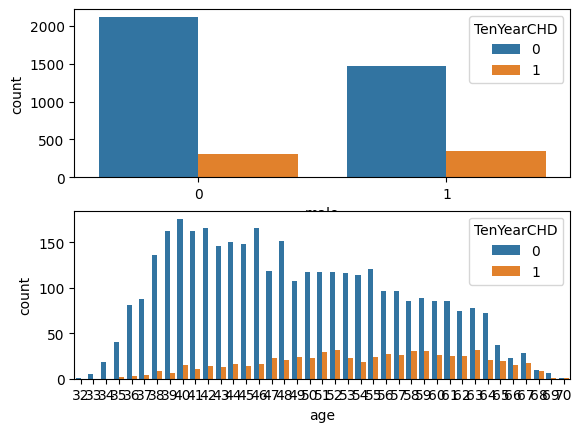

In [16]:
fig, ax = plt.subplots(2)
sns.countplot(x='male',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='age',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

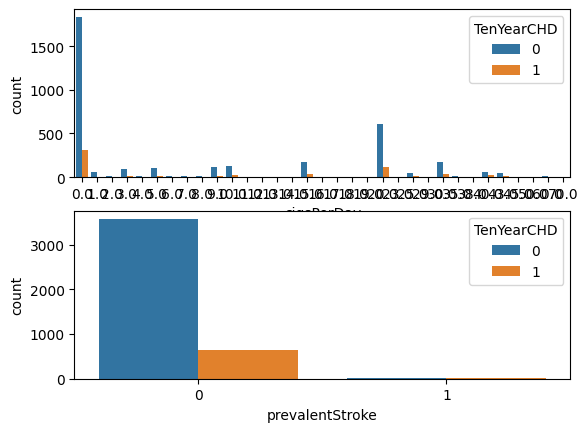

In [17]:
fig, ax = plt.subplots(2)
sns.countplot(x='cigsPerDay',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='prevalentStroke',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

# 4- Defining X(features) and y(label)

In [18]:
X = df1[["male","age","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
y = df1[["TenYearCHD"]]

# 5- Normalizing dataset

## 5-1- Before Normalization

In [19]:
X.mean()

male                 0.445185
age                 49.578821
currentSmoker        0.488397
cigsPerDay           9.005335
BPMeds               0.030408
prevalentStroke      0.005601
prevalentHyp         0.311816
diabetes             0.027207
totChol            236.952787
sysBP              132.365964
diaBP               82.933716
BMI                 25.809651
heartRate           75.703921
glucose             81.883169
dtype: float64

In [20]:
X.std()

male                0.497053
age                 8.569322
currentSmoker       0.499932
cigsPerDay         11.922440
BPMeds              0.171730
prevalentStroke     0.074643
prevalentHyp        0.463297
diabetes            0.162709
totChol            44.610417
sysBP              22.051951
diaBP              11.933321
BMI                 4.065894
heartRate          11.957763
glucose            23.888039
dtype: float64

## 5-2- Normalization

In [21]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

## 5-3- After Normalization

In [22]:
X.mean()

-3.9394874081886437e-17

In [23]:
X.std()

1.0

# 6- Train Test Split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 7- Modeling

In [25]:
LR = LogisticRegression().fit(X_train, y_train.values.ravel())

 # 8- Predicting

In [26]:
y_pred = LR.predict(X_test)

# 9- Confusiosn Matrix

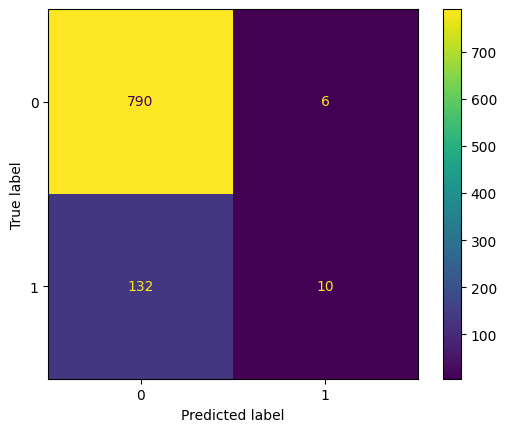

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# 10- Checking Accuracy

In [28]:
accuracy_score(y_test, y_pred)

0.8528784648187633

# 11- Checking The Probablity of Heart Disease for Test Set

In [29]:
y_pred_prob = LR.predict_proba(X_test)

In [30]:
y_pred_prob

array([[0.97456365, 0.02543635],
       [0.77770906, 0.22229094],
       [0.97685885, 0.02314115],
       ...,
       [0.8732486 , 0.1267514 ],
       [0.86256937, 0.13743063],
       [0.93793074, 0.06206926]])